## EDA + Feature Engineering

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [70]:
# print all the filenames inside the downloaded data
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Load Train Dataset

Train=pd.read_csv("/content/drive/MyDrive/bpm_fraud/Train-1542865627584.csv")
Train_Beneficiary=pd.read_csv("/content/drive/MyDrive/bpm_fraud/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient=pd.read_csv("/content/drive/MyDrive/bpm_fraud/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient=pd.read_csv("/content/drive/MyDrive/bpm_fraud/Train_Outpatientdata-1542865627584.csv")



In [73]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

# convert all these columns datatypes to numeric
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)
# Replacing '2' with '0' for Gender Type
Train_Beneficiary = Train_Beneficiary.replace({'Gender': 2}, 0)
# Convert Date of Birth and Date of Death from String to Datetime format
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format = '%Y-%m-%d')


In [77]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1

# ExtraClaimDays = Claim_Period - Hospitalization_Duration
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)

# Get the months and year of claim start and claim end
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month

Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month

Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

# Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1



In [79]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month


Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month

# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0

## Merge Inpatient and Outpatient Data

In [95]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [96]:
Inpatient_Outpatient_Merge.shape

(558211, 38)

In [97]:
Inpatient_Outpatient_Merge.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Inpatient_or_Outpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,7.0,7,0.0,2009,4,2009,4,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,3.0,3,0.0,2009,8,2009,9,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,4.0,4,0.0,2009,9,2009,9,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,NaN,NaN,9.0,9,0.0,2009,2,2009,2,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,NaN,NaN,18.0,18,0.0,2009,8,2009,8,1


In [98]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider' )

In [99]:
Inpatient_Outpatient_Beneficiary_Merge.shape

(558211, 66)

In [100]:
Inpatient_Outpatient_Beneficiary_Merge.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age,Birth_Year,Birth_Month,isDead
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,67.0,1943,1,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,36000,3204,60,70,67.0,1943,1,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,67.0,1943,1,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,96.0,1914,3,0
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaT,...,1,1,5000,1068,250,320,96.0,1914,3,0


In [102]:
Final_Dataset_Train.shape

(558211, 67)

In [103]:
Final_Dataset_Train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age,Birth_Year,Birth_Month,isDead,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,36000,3204,60,70,67.0,1943,1,0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,0,24000,2136,450,200,78.0,1932,5,0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,19000,1068,100,20,96.0,1913,12,0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,17000,1068,1050,540,87.0,1922,10,0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,0,27000,2136,450,160,79.0,1930,7,0,Yes


In [104]:

# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

In [105]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Al

In [108]:
claims_df=Final_Dataset_Train
df=claims_df

<ipython-input-109-d6e15f6b7e9f>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


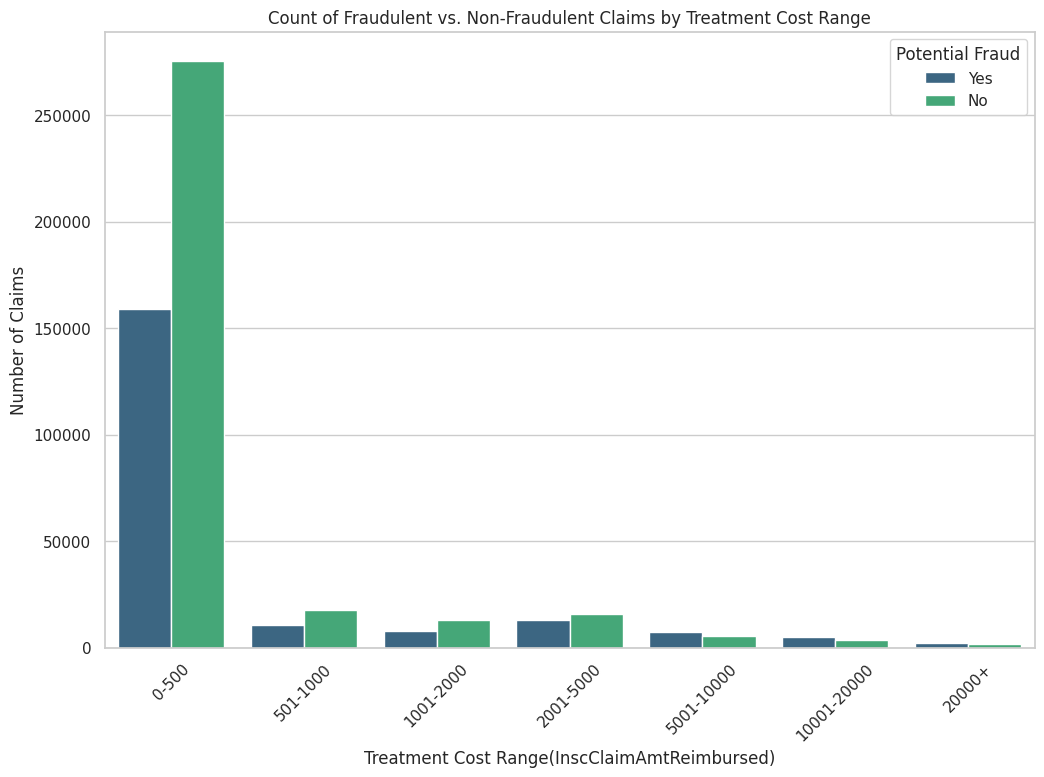

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it includes 'InscClaimAmtReimbursed' and 'PotentialFraud'
# df = pd.read_csv('your_data.csv')

# Define the bin edges
bins = [0, 500, 1000, 2000, 5000, 10000, 20000, float('inf')]
labels = ['0-500', '501-1000', '1001-2000', '2001-5000', '5001-10000', '10001-20000', '20000+']

# Bin the treatment costs
claims_df['CostRange'] = pd.cut(claims_df['InscClaimAmtReimbursed'], bins=bins, labels=labels)

# Set the figure size and style
sns.set(rc={'figure.figsize':(12, 8)}, style='whitegrid')

# Create a count plot
ax = sns.countplot(x='CostRange', hue='PotentialFraud', data=claims_df, palette='viridis')

# Set the title and labels
ax.set_title('Count of Fraudulent vs. Non-Fraudulent Claims by Treatment Cost Range')
ax.set_xlabel('Treatment Cost Range(InscClaimAmtReimbursed)')
ax.set_ylabel('Number of Claims')

# Rotate the x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Display the legend
plt.legend(title='Potential Fraud')

# Show the plot
plt.show()


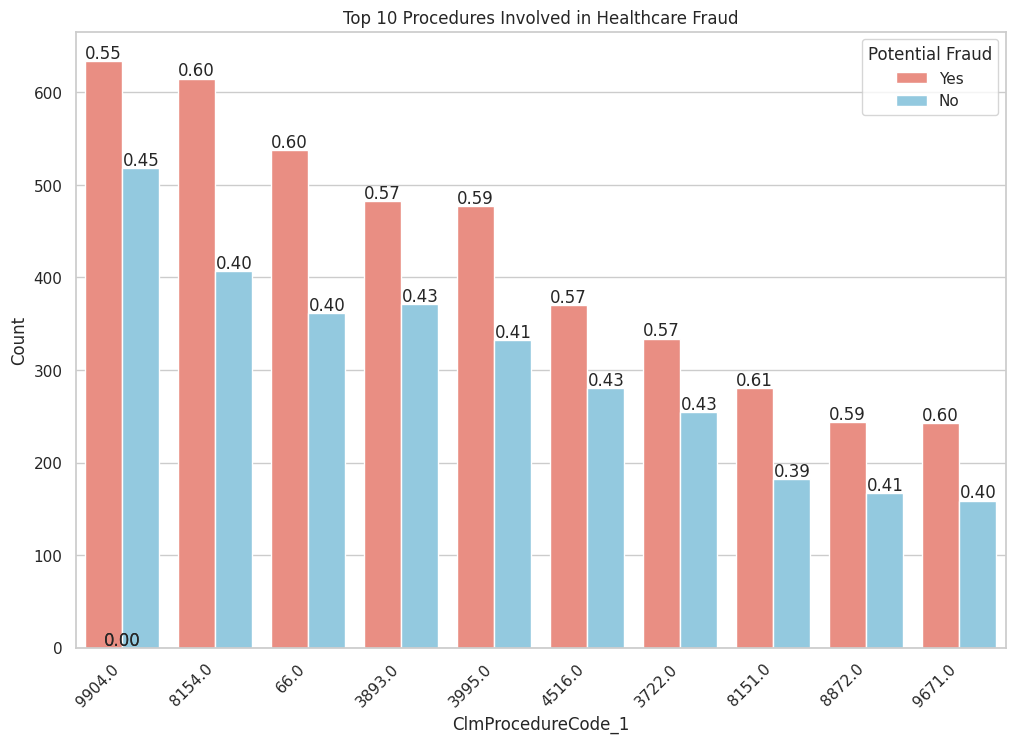

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming claims_df is your DataFrame and is already defined

# Set custom color palette
custom_palette = {'No': 'skyblue', 'Yes': 'salmon'}  # You can change these colors as needed

# Set figure size and style
sns.set(rc={'figure.figsize':(12, 8)}, style='whitegrid')

# Select the top 10 ClmProcedureCode_1 values
top_procedures = claims_df['ClmProcedureCode_1'].value_counts().iloc[:10].index

# Filter the data for the top 10 procedures
filtered_data = claims_df[claims_df['ClmProcedureCode_1'].isin(top_procedures)]

# Create the countplot with hue for PotentialFraud and custom palette
ax = sns.countplot(x='ClmProcedureCode_1', hue='PotentialFraud', data=filtered_data, order=top_procedures, palette=custom_palette)

# Set title and labels
plt.title('Top 10 Procedures Involved in Healthcare Fraud')
plt.xlabel('ClmProcedureCode_1')
plt.ylabel('Count')

# Show legend
plt.legend(title='Potential Fraud', loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, horizontalalignment='right')

# Calculate and annotate the proportion of fraud for each procedure code
for i, p in enumerate(ax.patches):
    height = p.get_height()
    # Find the procedure code for this patch by using the patch's index
    procedure_code = top_procedures[i % len(top_procedures)]
    total = filtered_data[filtered_data['ClmProcedureCode_1'] == procedure_code]['PotentialFraud'].count()
    if total > 0:
        proportion = height / total
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}'.format(proportion), ha="center")

# Save the plot with a better filename
plt.savefig('TopProcedures_HealthcareFraud_CountPlot_CustomColors_withProportions.png', bbox_inches='tight')

# Show the plot
plt.show()


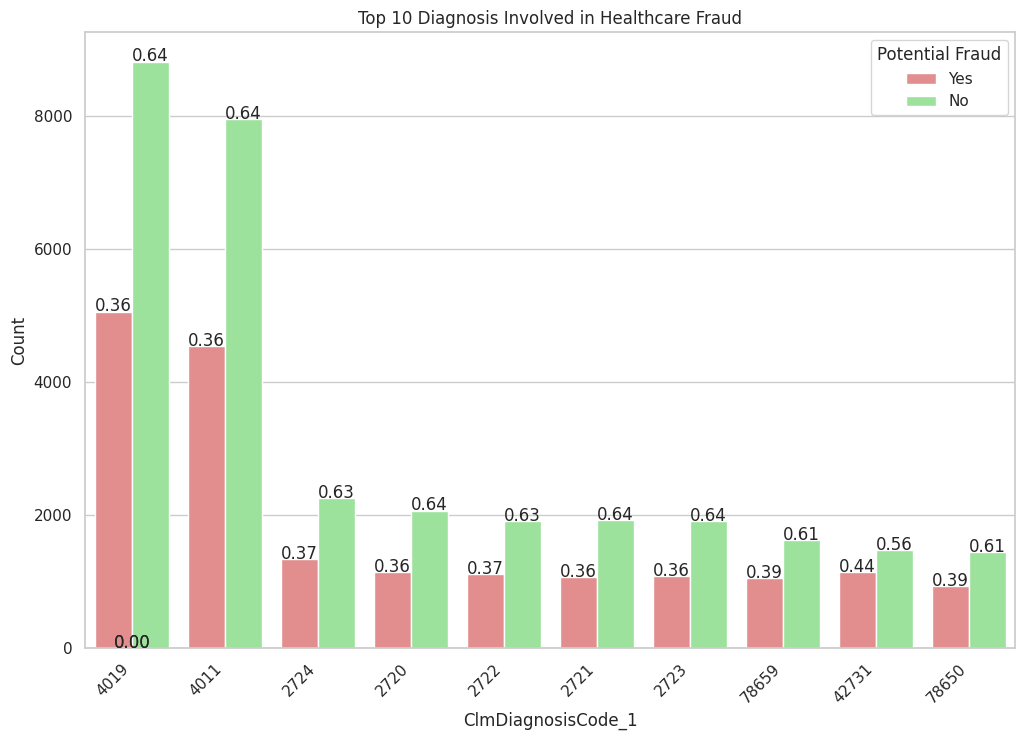

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming claims_df is your DataFrame and is already defined

# Set custom color palette
custom_palette = {'No': 'lightgreen', 'Yes': 'lightcoral'}  # You can change these colors as needed

# Set figure size and style
sns.set(rc={'figure.figsize':(12, 8)}, style='whitegrid')

# Select the top 10 ClmDiagnosisCode_1 values
top_diagnosis_codes = claims_df['ClmDiagnosisCode_1'].value_counts().iloc[:10].index

# Filter the data for the top 10 diagnosis codes
filtered_data_diagnosis = claims_df[claims_df['ClmDiagnosisCode_1'].isin(top_diagnosis_codes)]

# Create the countplot with hue for PotentialFraud and custom palette
ax = sns.countplot(x='ClmDiagnosisCode_1', hue='PotentialFraud', data=filtered_data_diagnosis, order=top_diagnosis_codes, palette=custom_palette)

# Set title and labels
plt.title('Top 10 Diagnosis Involved in Healthcare Fraud')
plt.xlabel('ClmDiagnosisCode_1')
plt.ylabel('Count')

# Show legend
plt.legend(title='Potential Fraud', loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, horizontalalignment='right')

# Calculate and annotate the proportion of fraud for each diagnosis code
for i, p in enumerate(ax.patches):
    height = p.get_height()
    # Find the diagnosis code for this patch by using the patch's index
    diagnosis_code = top_diagnosis_codes[i % len(top_diagnosis_codes)]
    total = filtered_data_diagnosis[filtered_data_diagnosis['ClmDiagnosisCode_1'] == diagnosis_code]['PotentialFraud'].count()
    if total > 0:
        proportion = height / total
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}'.format(proportion), ha="center")

# Save the plot with a better filename
plt.savefig('TopDiagnosis_HealthcareFraud_CountPlot_CustomColors_withProportions.png', bbox_inches='tight')

# Show the plot
plt.show()


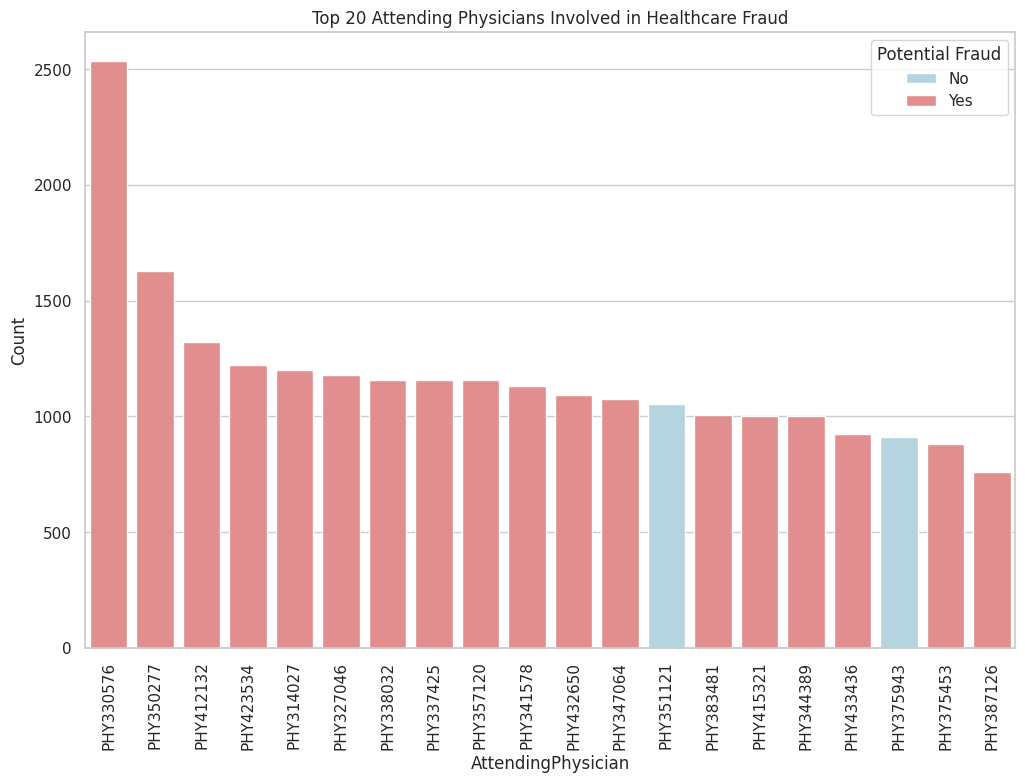

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom color palette
custom_palette = {'No': 'lightblue', 'Yes': 'lightcoral'}  # You can change these colors as needed

# Set figure size and style
sns.set(rc={'figure.figsize':(12, 8)}, style='whitegrid')

# Select the top 20 AttendingPhysician values
top_attending_physicians = claims_df['AttendingPhysician'].value_counts().iloc[:20].index

# Filter the data for the top 20 attending physicians
filtered_data_physicians = claims_df[claims_df['AttendingPhysician'].isin(top_attending_physicians)]

# Create the countplot with hue for PotentialFraud and custom palette
ax = sns.countplot(x='AttendingPhysician', hue='PotentialFraud', data=filtered_data_physicians, order=top_attending_physicians, palette=custom_palette)

# Set title and labels
plt.title('Top 20 Attending Physicians Involved in Healthcare Fraud')
plt.xlabel('AttendingPhysician')
plt.ylabel('Count')

# Show legend
plt.legend(title='Potential Fraud', loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot with a better filename
plt.savefig('TopAttendingPhysicians_HealthcareFraud_CountPlot_CustomColors.png', bbox_inches='tight')

# Show the plot
plt.show()


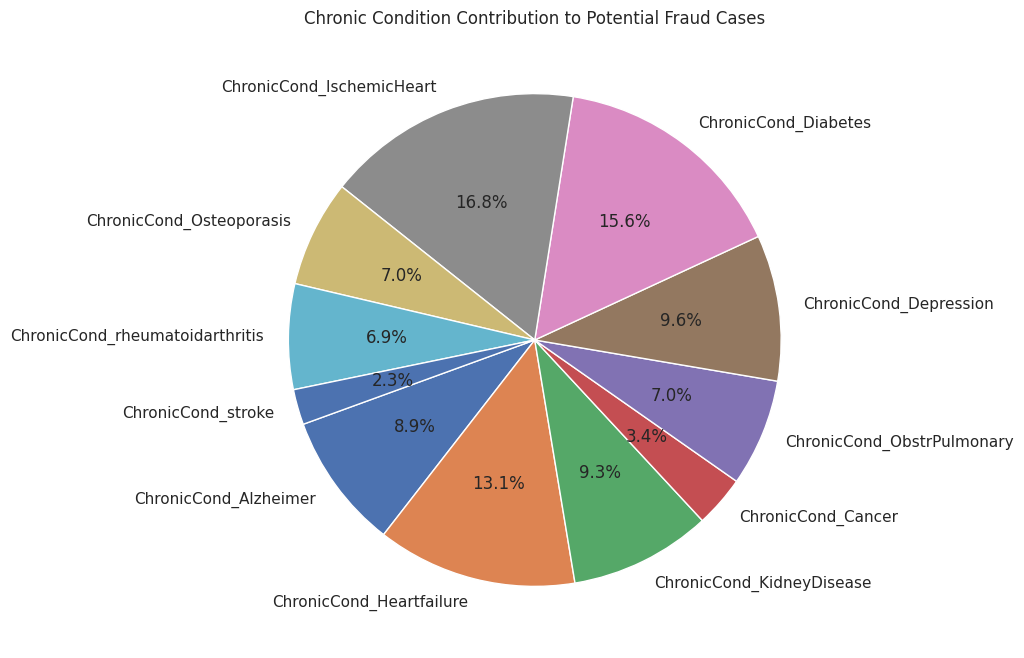

In [113]:
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame containing the chronic condition columns
# and a 'PotentialFraud' column that indicates if a claim was potentially fraudulent.

# Filter the DataFrame for cases where Potential Fraud is 'Yes'
fraud_cases = df[df['PotentialFraud'] == 'Yes']

# Now select only the chronic condition columns for these fraud cases
chronic_conditions = ['ChronicCond_Alzheimer',
                      'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
                      'ChronicCond_Depression', 'ChronicCond_Diabetes',
                      'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',] # Add all relevant conditions

# Calculate the sum of each chronic condition within fraud cases
condition_counts_fraud = fraud_cases[chronic_conditions].sum()

# Plotting the pie chart with percentages for fraud cases
condition_counts_fraud.plot(kind='pie', autopct='%1.1f%%', startangle=200)
plt.title('Chronic Condition Contribution to Potential Fraud Cases')
plt.ylabel('')  # Hides the 'Count' ylabel which is not needed for pie charts
plt.show()


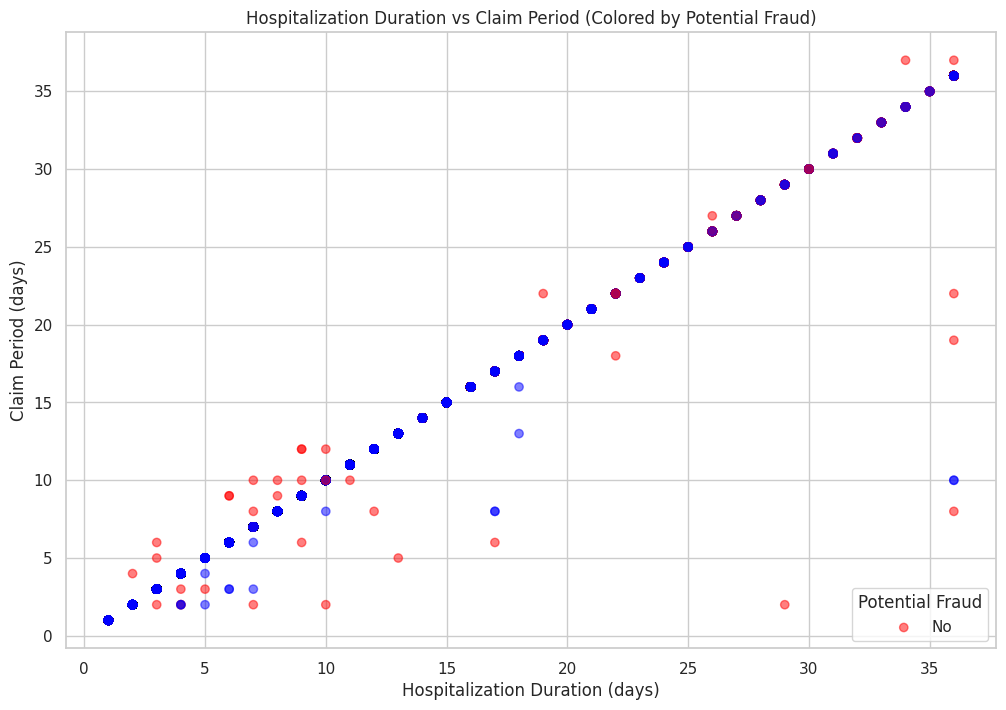

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
sns.set(rc={'figure.figsize':(12, 8)}, style='whitegrid')

claims_df['ClaimStartDt'] = pd.to_datetime(claims_df['ClaimStartDt'], format='%Y-%m-%d')
claims_df['ClaimEndDt'] = pd.to_datetime(claims_df['ClaimEndDt'], format='%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
claims_df['AdmissionDt'] = pd.to_datetime(claims_df['AdmissionDt'], format='%Y-%m-%d')
claims_df['DischargeDt'] = pd.to_datetime(claims_df['DischargeDt'], format='%Y-%m-%d')

# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
claims_df['Hospitalization_Duration'] = ((claims_df['DischargeDt'] - claims_df['AdmissionDt']).dt.days) + 1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
claims_df['Claim_Period'] = ((claims_df['ClaimEndDt'] - claims_df['ClaimStartDt']).dt.days) + 1

# ExtraClaimDays = Claim_Period - Hospitalization_Duration
claims_df['ExtraClaimDays'] = np.where(claims_df['Claim_Period'] > claims_df['Hospitalization_Duration'],
                                                                  claims_df['Claim_Period'] - claims_df['Hospitalization_Duration'],
                                                                  0)

# Scatter plot with points marked by PotentialFraud
plt.scatter(claims_df['Hospitalization_Duration'], claims_df['Claim_Period'],
            c=claims_df['PotentialFraud'].map({'No': 'Blue', 'Yes': 'Red'}), alpha=0.5,label='No')

# Set title and labels
plt.title('Hospitalization Duration vs Claim Period (Colored by Potential Fraud)')
plt.xlabel('Hospitalization Duration (days)')
plt.ylabel('Claim Period (days)')
plt.legend(title='Potential Fraud', loc='lower right')



# Show the plot
plt.show()


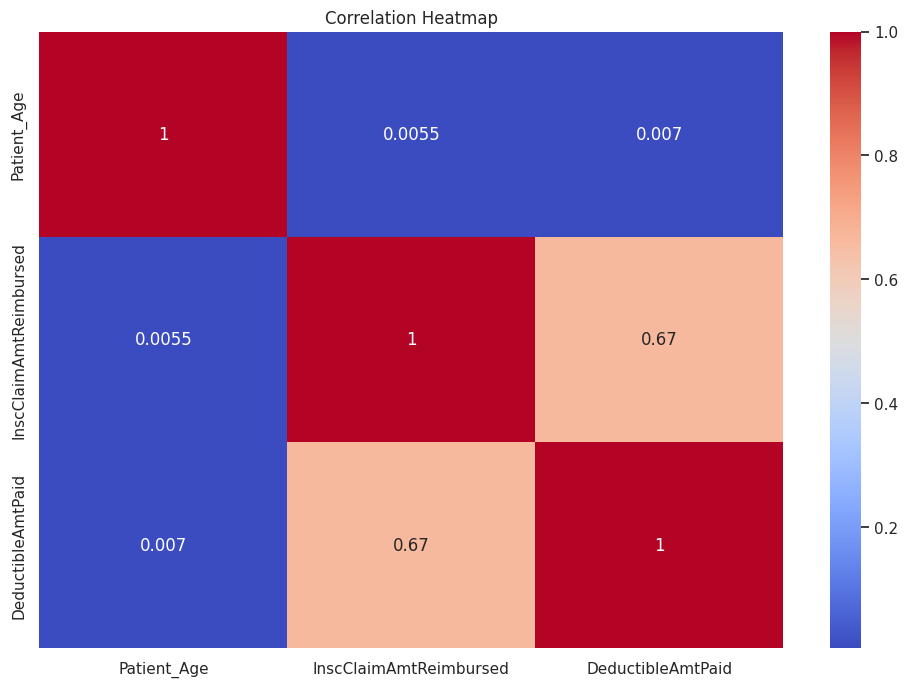

In [115]:
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = ['Patient_Age', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

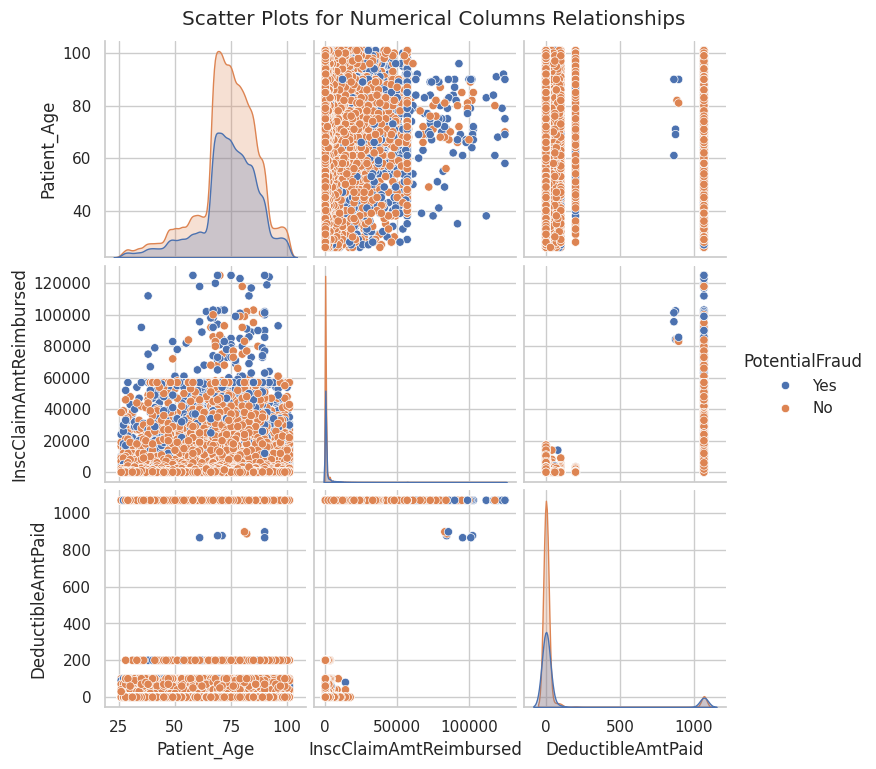

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming we have a DataFrame 'df' with these columns already present.
# If not, you would need to create or update your DataFrame accordingly.

# Defining the numerical columns to analyze
numerical_cols = ['Patient_Age', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid']

# Creating a pairplot to visualize the relationships between these numerical columns
sns.pairplot(df[numerical_cols + ['PotentialFraud']], hue='PotentialFraud')
plt.suptitle('Scatter Plots for Numerical Columns Relationships', y=1.02)  # Adjusting the title position
plt.show()


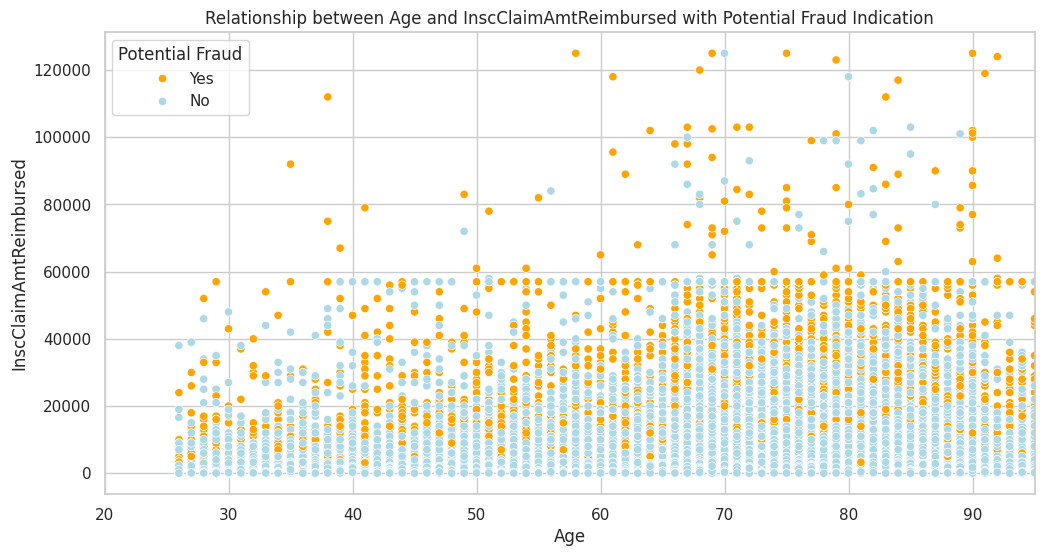

In [117]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Patient_Age', y='InscClaimAmtReimbursed',
                hue='PotentialFraud', data=df,
                palette={'Yes': 'orange', 'No': 'lightblue'})
plt.title('Relationship between Age and InscClaimAmtReimbursed with Potential Fraud Indication')
plt.xlabel('Age')
plt.ylabel('InscClaimAmtReimbursed')
plt.legend(title='Potential Fraud')
plt.xlim(20,95)
plt.show()

In [118]:
# # Convert type of Gender and Race to categorical
# Final_Dataset_Train.Gender=Final_Dataset_Train.Gender.astype('category')
# Final_Dataset_Test.Gender=Final_Dataset_Test.Gender.astype('category')

# Final_Dataset_Train.Race=Final_Dataset_Train.Race.astype('category')
# Final_Dataset_Test.Race=Final_Dataset_Test.Race.astype('category')

In [119]:
# # Do one hot encoding for gender and Race
# Final_Dataset_Train=pd.get_dummies(Final_Dataset_Train,columns=['Gender','Race'])
# Final_Dataset_Test=pd.get_dummies(Final_Dataset_Test,columns=['Gender','Race'])

In [120]:
# Example: Identifying outliers in reimbursements for similar diagnosis codes
claims_df=Final_Dataset_Train

In [121]:
suspect_claims_a = claims_df[(claims_df['InscClaimAmtReimbursed'] > 0) &
                             (claims_df[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6','ClmAdmitDiagnosisCode','DiagnosisGroupCode']].isnull().all(axis=1))]


In [122]:
# suspect_claims_a.to_csv("suspect_claims.csv")

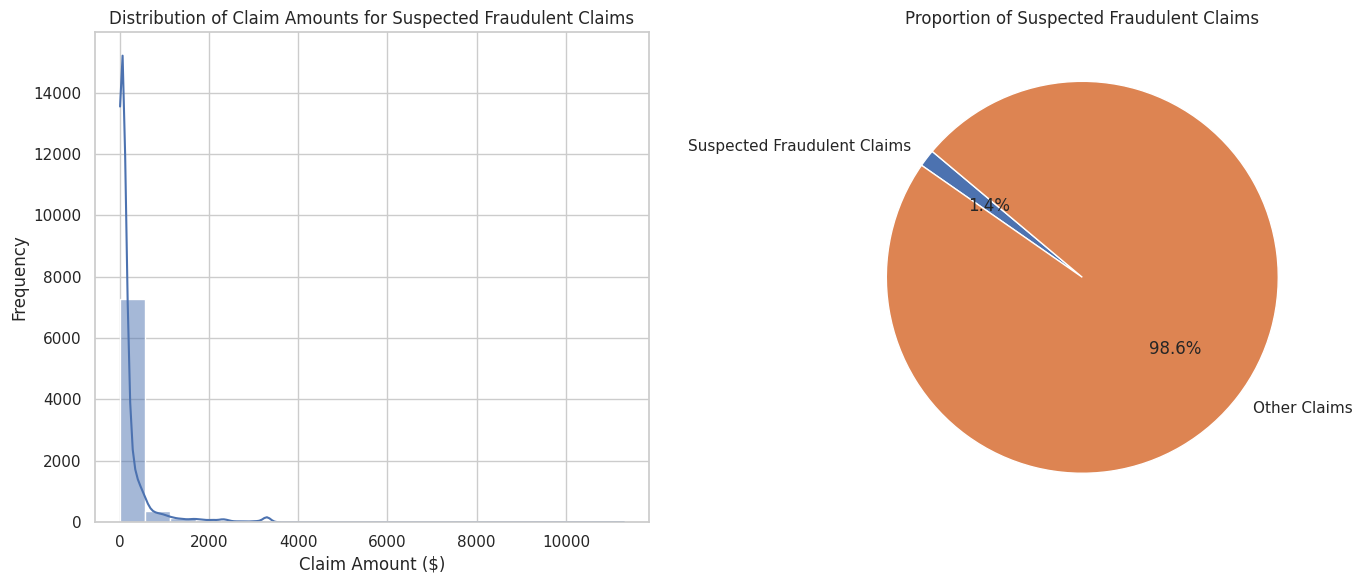

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'suspect_claims_a' contains the suspected fraudulent claims from your DataFrame
# Here's how you could visualize these claims:

# Distribution of Claim Amounts for Suspected Fraudulent Claims
plt.figure(figsize=(14, 6))

# Histogram for the distribution of claim amounts
plt.subplot(1, 2, 1)
sns.histplot(suspect_claims_a['InscClaimAmtReimbursed'], bins=20, kde=True)
plt.title('Distribution of Claim Amounts for Suspected Fraudulent Claims')
plt.xlabel('Claim Amount ($)')
plt.ylabel('Frequency')

# Pie chart for the proportion of suspected fraudulent claims
plt.subplot(1, 2, 2)
fraud_proportions = [len(suspect_claims_a), len(claims_df) - len(suspect_claims_a)]
labels = ['Suspected Fraudulent Claims', 'Other Claims']
plt.pie(fraud_proportions, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Suspected Fraudulent Claims')

plt.tight_layout()
plt.show()


In [124]:
duplicate_claims = claims_df[claims_df.duplicated(subset=['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt'], keep=False)]


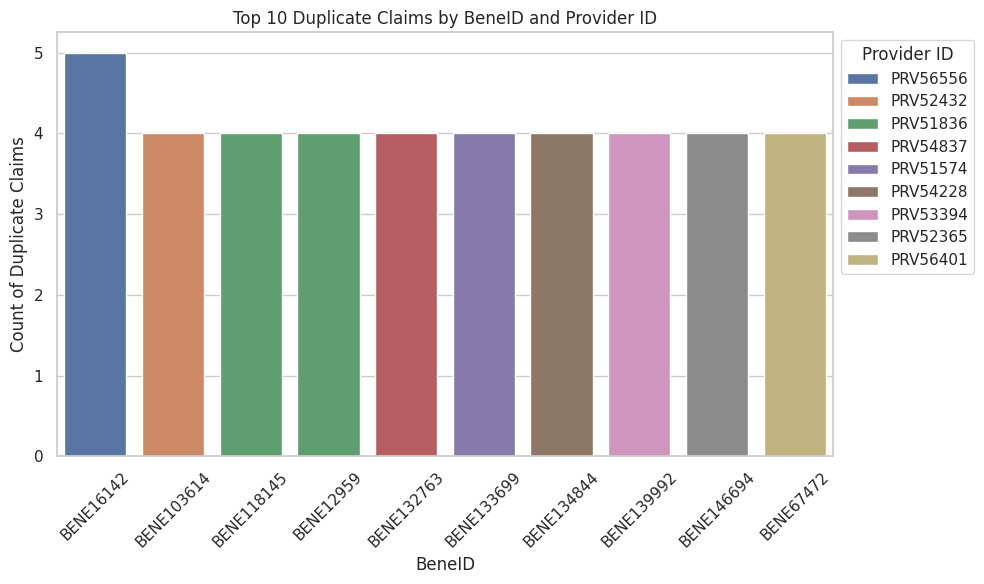

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'claims_df' is your DataFrame containing claims data

# Filter duplicate claims
duplicate_claims = claims_df[claims_df.duplicated(subset=['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt'], keep=False)]

# Get the top 10 combinations of BeneID and Provider ID
top_duplicates = duplicate_claims.groupby(['BeneID', 'Provider']).size().nlargest(10).reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='BeneID', y='Count', hue='Provider', data=top_duplicates)
plt.title('Top 10 Duplicate Claims by BeneID and Provider ID')
plt.xlabel('BeneID')
plt.ylabel('Count of Duplicate Claims')
plt.xticks(rotation=45)
plt.legend(title='Provider ID', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


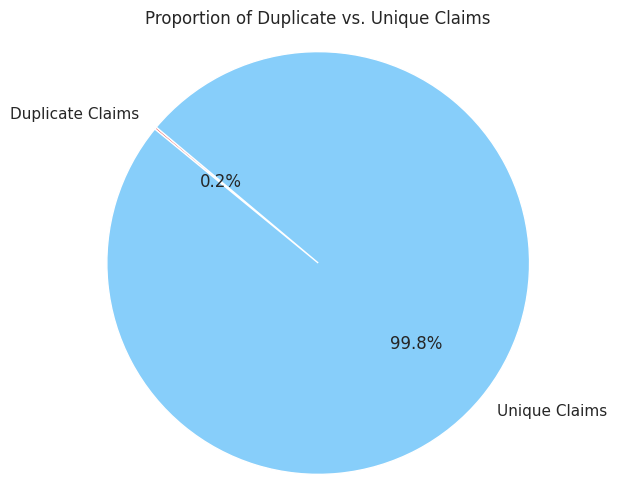

In [126]:
import pandas as pd

# Assuming claims_df is your DataFrame containing all claims
total_claims_count = len(claims_df)  # Total number of claims

# Identifying duplicate claims (already done in your example)
duplicate_claims = claims_df[claims_df.duplicated(subset=['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt'], keep=False)]
duplicate_claims_count = len(duplicate_claims.drop_duplicates(subset=['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt']))

# Calculating the number of unique claims
unique_claims_count = total_claims_count - duplicate_claims_count

# Data to plot
labels = 'Duplicate Claims', 'Unique Claims'
sizes = [duplicate_claims_count, unique_claims_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Duplicate vs. Unique Claims')
plt.show()



In [127]:
# import pandas as pd

# # Assuming 'data' is your DataFrame containing the provided fields
# data=claims_df
# # Concatenating diagnosis codes into a single column for easier analysis
# diagnosis_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
#                      'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
#                      'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10''DiagnosisGroupCode']
# data['AllDiagnosisCodes'] = data[diagnosis_columns].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# # Grouping by Provider and ClaimID, then counting the number of unique diagnoses for each group
# double_billing_counts = data.groupby(['Provider', 'ClaimID'])['AllDiagnosisCodes'].nunique()

# # Identifying providers and claims with more than one unique diagnosis
# potential_double_billing = double_billing_counts[double_billing_counts > 1]

# # Displaying potential cases of double billing
# print("Potential cases of double billing:")
# print(potential_double_billing)


In [128]:
# import pandas as pd

# # Assuming 'data' is your DataFrame containing the provided fields
# data = claims_df

# # Concatenating diagnosis codes into a single column for easier analysis
# diagnosis_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
#                      'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
#                      'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'DiagnosisGroupCode']
# data['AllDiagnosisCodes'] = data[diagnosis_columns].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# # Grouping by Provider, BeneID, and ClaimStartDt, then counting the number of unique diagnoses for each group
# #double_billing_counts = data.groupby(['Provider', 'BeneID', 'ClaimStartDt','ClaimEndDt'])['AllDiagnosisCodes'].nunique()

# # Grouping by BeneID, Provider, ClaimStartDt, and ClaimEndDt, then checking for duplicated diagnosis codes
# duplicated_diagnosis = data.groupby(['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt'])['AllDiagnosisCodes'].apply(lambda x: x.duplicated()).reset_index(name='is_duplicated')

# # Filtering the DataFrame to include only rows where diagnosis code is duplicated
# filtered_data = data[duplicated_diagnosis['is_duplicated']]

# # Displaying the filtered DataFrame
# print("Filtered DataFrame with duplicated diagnosis codes:")
# filtered_data
